In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

In [2]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseValue'] = data.target

df.to_csv('housing_data.csv', index=False)

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

Dataset shape: (20640, 9)

First few rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  


In [3]:
print("\nFeature statistics:")
print(df.describe())


Feature statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  MedHouseValue  
count  20640.000000  20640.000000  20640.000000   20640.000000  
mean       3.070655     35.631861   -119.569704       2.068558  
std       10.386050      2.135952      2.003532       1.153956  
min    

In [4]:
X = df[['MedInc']]
y = df['MedHouseValue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("--- Model Results ---")
print(f"Coefficient: {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

--- Model Results ---
Coefficient: 0.4193
Intercept: 0.4446
RMSE: 0.8421
R² Score: 0.4589


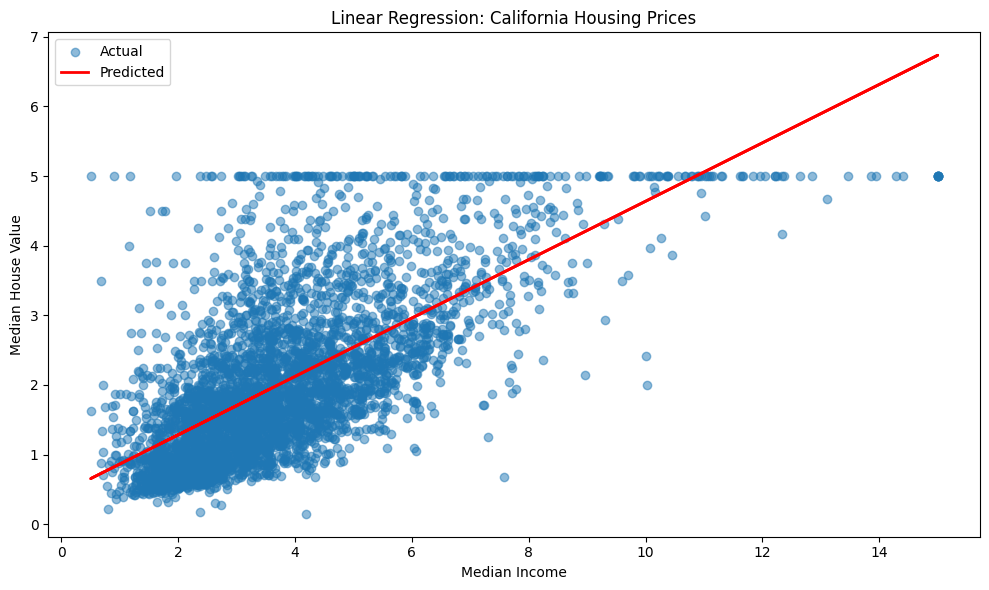


Plot saved as regression_plot.png


In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.5, label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Linear Regression: California Housing Prices')
plt.legend()
plt.tight_layout()
plt.savefig('regression_plot.png', dpi=150)
plt.show()

print("\nPlot saved as regression_plot.png")